In [28]:
# https://www.kaggle.com/datasets/sid321axn/malicious-urls-dataset/code

In [29]:
# import packages
import pandas as pd
import seaborn as sns
from matplotlib.ticker import StrMethodFormatter
import matplotlib.ticker as ticker
import itertools
from sklearn.metrics import mean_squared_error,confusion_matrix, precision_score, recall_score, auc,roc_curve
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import random
import math
from collections import Counter
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
import xgboost as xgb
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
import os
import socket
import whois
from datetime import datetime
import time
from bs4 import BeautifulSoup
import urllib
import bs4
import os

In [30]:
df = pd.read_csv('/Users/taylorhurt/Desktop/CIDM_6341_cybersecurity/malicious_phish.csv',index_col=False)
df['type']=df['type'].astype('category')
print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 651191 entries, 0 to 651190
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype   
---  ------  --------------   -----   
 0   url     651191 non-null  object  
 1   type    651191 non-null  category
dtypes: category(1), object(1)
memory usage: 5.6+ MB
None


,url,type
0,br-icloud.com.br,phishing
1,mp3raid.com/music/krizz_kaliko.html,benign
2,bopsecrets.org/rexroth/cr/1.htm,benign
3,http://www.garage-pirenne.be/index.php?option=...,defacement
4,http://adventure-nicaragua.net/index.php?optio...,defacement


In [31]:
# display the type of urls in the dataset
count = df.type.value_counts()
print(count)
x = count.index
print(x)

benign        428103
defacement     96457
phishing       94111
malware        32520
Name: type, dtype: int64
CategoricalIndex(['benign', 'defacement', 'phishing', 'malware'], categories=['benign', 'defacement', 'malware', 'phishing'], ordered=False, dtype='category')


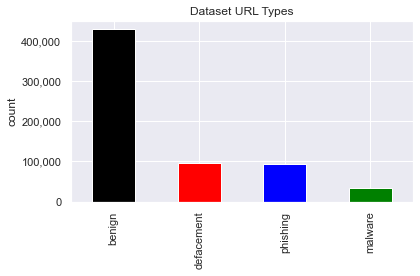

In [32]:
sns.set(style='darkgrid')
fg = df['type'].value_counts().plot.bar(ylabel='count',title='Dataset URL Types',color=['black','red','blue','green'])
fg.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
plt.tight_layout()
plt.show()

In [33]:
import re
#Use of IP or not in domain
def having_ip_address(url):
    match = re.search(
        '(([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\.([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\.([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\.'
        '([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\/)|'  # IPv4
        '((0x[0-9a-fA-F]{1,2})\\.(0x[0-9a-fA-F]{1,2})\\.(0x[0-9a-fA-F]{1,2})\\.(0x[0-9a-fA-F]{1,2})\\/)' # IPv4 in hexadecimal
        '(?:[a-fA-F0-9]{1,4}:){7}[a-fA-F0-9]{1,4}', url)  # Ipv6
    if match:
        # print match.group()
        return 1
    else:
        # print 'No matching pattern found'
        return 0
df['use_of_ip'] = df['url'].apply(lambda i: having_ip_address(i))

In [34]:
from urllib.parse import urlparse


def abnormal_url(url):
    hostname = urlparse(url).hostname
    hostname = str(hostname)
    match = re.search(hostname, url)
    if match:
        # print match.group()
        return 1
    else:
        # print 'No matching pattern found'
        return 0


df['abnormal_url'] = df['url'].apply(lambda i: abnormal_url(i))

In [35]:
df['count.'] = df['url'].apply(lambda i: i.count('.'))
df.head()

,url,type,use_of_ip,abnormal_url,count.
0,br-icloud.com.br,phishing,0,0,2
1,mp3raid.com/music/krizz_kaliko.html,benign,0,0,2
2,bopsecrets.org/rexroth/cr/1.htm,benign,0,0,2
3,http://www.garage-pirenne.be/index.php?option=...,defacement,0,1,3
4,http://adventure-nicaragua.net/index.php?optio...,defacement,0,1,2


In [36]:
df['count-www'] = df['url'].apply(lambda i: i.count('www'))
df['count@'] = df['url'].apply(lambda i: i.count('@'))
from urllib.parse import urlparse
def no_of_dir(url):
    urldir = urlparse(url).path
    return urldir.count('/')
df['count_dir'] = df['url'].apply(lambda i: no_of_dir(i))
def no_of_embed(url):
    urldir = urlparse(url).path
    return urldir.count('//')
df['count_embed_domian'] = df['url'].apply(lambda i: no_of_embed(i))
def shortening_service(url):
    match = re.search('bit\.ly|goo\.gl|shorte\.st|go2l\.ink|x\.co|ow\.ly|t\.co|tinyurl|tr\.im|is\.gd|cli\.gs|'
                      'yfrog\.com|migre\.me|ff\.im|tiny\.cc|url4\.eu|twit\.ac|su\.pr|twurl\.nl|snipurl\.com|'
                      'short\.to|BudURL\.com|ping\.fm|post\.ly|Just\.as|bkite\.com|snipr\.com|fic\.kr|loopt\.us|'
                      'doiop\.com|short\.ie|kl\.am|wp\.me|rubyurl\.com|om\.ly|to\.ly|bit\.do|t\.co|lnkd\.in|'
                      'db\.tt|qr\.ae|adf\.ly|goo\.gl|bitly\.com|cur\.lv|tinyurl\.com|ow\.ly|bit\.ly|ity\.im|'
                      'q\.gs|is\.gd|po\.st|bc\.vc|twitthis\.com|u\.to|j\.mp|buzurl\.com|cutt\.us|u\.bb|yourls\.org|'
                      'x\.co|prettylinkpro\.com|scrnch\.me|filoops\.info|vzturl\.com|qr\.net|1url\.com|tweez\.me|v\.gd|'
                      'tr\.im|link\.zip\.net',
                      url)
    if match:
        return 1
    else:
        return 0
df['short_url'] = df['url'].apply(lambda i: shortening_service(i))

In [37]:
df['count-https'] = df['url'].apply(lambda i : i.count('https'))
df['count-http'] = df['url'].apply(lambda i : i.count('http'))

In [38]:
df['count%'] = df['url'].apply(lambda i: i.count('%'))
df['count?'] = df['url'].apply(lambda i: i.count('?'))
df['count-'] = df['url'].apply(lambda i: i.count('-'))
df['count='] = df['url'].apply(lambda i: i.count('='))
#Length of URL
df['url_length'] = df['url'].apply(lambda i: len(str(i)))
#Hostname Length
df['hostname_length'] = df['url'].apply(lambda i: len(urlparse(i).netloc))

df.head()

,url,type,use_of_ip,abnormal_url,count.,count-www,count@,count_dir,count_embed_domian,short_url,count-https,count-http,count%,count?,count-,count=,url_length,hostname_length
0,br-icloud.com.br,phishing,0,0,2,0,0,0,0,0,0,0,0,0,1,0,16,0
1,mp3raid.com/music/krizz_kaliko.html,benign,0,0,2,0,0,2,0,0,0,0,0,0,0,0,35,0
2,bopsecrets.org/rexroth/cr/1.htm,benign,0,0,2,0,0,3,0,0,0,0,0,0,0,0,31,0
3,http://www.garage-pirenne.be/index.php?option=...,defacement,0,1,3,1,0,1,0,0,0,1,0,1,1,4,88,21
4,http://adventure-nicaragua.net/index.php?optio...,defacement,0,1,2,0,0,1,0,0,0,1,0,1,1,3,235,23


In [39]:
def suspicious_words(url):
    match = re.search('PayPal|login|signin|bank|account|update|free|lucky|service|bonus|ebayisapi|webscr',
                      url)
    if match:
        return 1
    else:
        return 0
df['sus_url'] = df['url'].apply(lambda i: suspicious_words(i))

In [40]:
#Importing dependencies
from urllib.parse import urlparse
from tld import get_tld
import os.path

#First Directory Length
def fd_length(url):
    urlpath= urlparse(url).path
    try:
        return len(urlpath.split('/')[1])
    except:
        return 0

df['fd_length'] = df['url'].apply(lambda i: fd_length(i))

#Length of Top Level Domain
df['tld'] = df['url'].apply(lambda i: get_tld(i,fail_silently=True))
def tld_length(tld):
    try:
        return len(tld)
    except:
        return -1

df['tld_length'] = df['tld'].apply(lambda i: tld_length(i))

In [41]:
def digit_count(url):
    digits = 0
    for i in url:
        if i.isnumeric():
            digits = digits + 1
    return digits
df['count-digits']= df['url'].apply(lambda i: digit_count(i))

In [42]:
def letter_count(url):
    letters = 0
    for i in url:
        if i.isalpha():
            letters = letters + 1
    return letters
df['count-letters']= df['url'].apply(lambda i: letter_count(i))

In [43]:
df = df.drop("tld",1)

<ipython-input-43-beaedf415f7f>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df = df.drop("tld",1)


In [44]:
from sklearn.preprocessing import LabelEncoder

lb_make = LabelEncoder()
df["type_code"] = lb_make.fit_transform(df["type"])
df["type_code"].value_counts()

0    428103
1     96457
3     94111
2     32520
Name: type_code, dtype: int64

In [45]:
#Predictor Variables
X = df[['use_of_ip','abnormal_url', 'count.', 'count-www', 'count@',
       'count_dir', 'count_embed_domian', 'short_url', 'count-https',
       'count-http', 'count%', 'count?', 'count-', 'count=', 'url_length',
       'hostname_length', 'sus_url', 'fd_length', 'tld_length', 'count-digits',
       'count-letters']]

#Target Variable
y = df['type_code']

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2,shuffle=True, random_state=5)

In [47]:
lgb = LGBMClassifier(objective='multiclass',boosting_type= 'gbdt',n_jobs = 5, 
          silent = True, random_state=5)
LGB_C = lgb.fit(X_train, y_train)


y_pred = LGB_C.predict(X_test)
print('LGBM Classifier Performance\n')
print(classification_report(y_test,y_pred))

score = metrics.accuracy_score(y_test, y_pred)

print("accuracy:   %0.3f" % score)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/lightgbm/sklearn.py:598: UserWarning: 'silent' argument is deprecated and will be removed in a future release of LightGBM. Pass 'verbose' parameter via keyword arguments instead.
  _log_warning("'silent' argument is deprecated and will be removed in a future release of LightGBM. "


LGBM Classifier Performance

              precision    recall  f1-score   support

           0       0.97      0.99      0.98     85621
           1       0.96      0.99      0.98     19292
           2       0.97      0.91      0.94      6504
           3       0.90      0.83      0.86     18822

    accuracy                           0.96    130239
   macro avg       0.95      0.93      0.94    130239
weighted avg       0.96      0.96      0.96    130239

accuracy:   0.959


In [48]:
from imblearn.over_sampling import SMOTE
method = SMOTE(random_state=2)
X_resampled, y_resampled = method.fit_resample(X,y)

In [49]:
from sklearn.model_selection import train_test_split

X_train_r, X_test_r, y_train_r, y_test_r = train_test_split(X_resampled,y_resampled, stratify=y_resampled, test_size = .2, shuffle=True,random_state = 5)

print('SMOTE')
print(X_train_r.shape)
print(f'{X_test_r.shape}\n')
print('Normal')
print(X_train.shape)
print(X_test.shape)

SMOTE
(1369929, 21)
(342483, 21)

Normal
(520952, 21)
(130239, 21)


In [50]:
print('non-SMOTE')
print(f'{pd.value_counts(pd.Series(y))}\n')


print('SMOTE')
print(f'{pd.value_counts(pd.Series(y_resampled))}\n')

non-SMOTE
0    428103
1     96457
3     94111
2     32520
Name: type_code, dtype: int64

SMOTE
3    428103
0    428103
1    428103
2    428103
Name: type_code, dtype: int64



In [51]:
lgb = LGBMClassifier(objective='multiclass',boosting_type= 'gbdt',n_jobs = 5, 
          silent = True, random_state=5)
LGB_C = lgb.fit(X_train_r, y_train_r)


y_pred_r = LGB_C.predict(X_test_r)
print('SMOTE LGBM Classifier Performance\n')
print(classification_report(y_test_r,y_pred_r))

score = metrics.accuracy_score(y_test_r, y_pred_r)
print("accuracy:   %0.3f" % score)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/lightgbm/sklearn.py:598: UserWarning: 'silent' argument is deprecated and will be removed in a future release of LightGBM. Pass 'verbose' parameter via keyword arguments instead.
  _log_warning("'silent' argument is deprecated and will be removed in a future release of LightGBM. "


SMOTE LGBM Classifier Performance

              precision    recall  f1-score   support

           0       0.92      0.95      0.93     85620
           1       0.96      0.99      0.97     85621
           2       0.98      0.94      0.96     85621
           3       0.90      0.88      0.89     85621

    accuracy                           0.94    342483
   macro avg       0.94      0.94      0.94    342483
weighted avg       0.94      0.94      0.94    342483

accuracy:   0.937


In [52]:
model = xgb.XGBClassifier(n_estimators= 100)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
print('XGB Classifier Performance\n')
print(classification_report(y_test,y_pred))


score = metrics.accuracy_score(y_test, y_pred)
print("accuracy:   %0.3f" % score)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:49:31] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGB Classifier Performance

              precision    recall  f1-score   support

           0       0.97      0.99      0.98     85621
           1       0.97      0.99      0.98     19292
           2       0.98      0.91      0.94      6504
           3       0.91      0.83      0.87     18822

    accuracy                           0.96    130239
   macro avg       0.96      0.93      0.94    130239
weighted avg       0.96      0.96      0.96    130239

accuracy:   0.962


In [53]:
model = xgb.XGBClassifier(n_estimators= 100)
model.fit(X_train_r,y_train_r)
y_pred_r = model.predict(X_test_r)
print('SMOTE XG Boost Performance\n')
print(classification_report(y_test_r,y_pred_r))


score = metrics.accuracy_score(y_test_r, y_pred_r)

print("accuracy:   %0.3f" % score)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:50:57] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
SMOTE XG Boost Performance

              precision    recall  f1-score   support

           0       0.92      0.95      0.94     85620
           1       0.97      0.99      0.98     85621
           2       0.98      0.95      0.96     85621
           3       0.91      0.89      0.90     85621

    accuracy                           0.94    342483
   macro avg       0.94      0.94      0.94    342483
weighted avg       0.94      0.94      0.94    342483

accuracy:   0.944


In [54]:
from sklearn.ensemble import GradientBoostingClassifier
gbdt = GradientBoostingClassifier(n_estimators=100,max_features='sqrt')
gbdt.fit(X_train,y_train)
y_pred = gbdt.predict(X_test)
print('Gradient Boost Performance\n')


print(classification_report(y_test,y_pred))

score = metrics.accuracy_score(y_test, y_pred)
print("accuracy:   %0.3f" % score)

Gradient Boost Performance

              precision    recall  f1-score   support

           0       0.95      0.99      0.97     85621
           1       0.90      0.97      0.93     19292
           2       0.93      0.78      0.85      6504
           3       0.88      0.74      0.80     18822

    accuracy                           0.94    130239
   macro avg       0.92      0.87      0.89    130239
weighted avg       0.93      0.94      0.93    130239

accuracy:   0.936


In [55]:
from sklearn.ensemble import GradientBoostingClassifier
gbdt = GradientBoostingClassifier(n_estimators=100,max_features='sqrt')
gbdt.fit(X_train_r,y_train_r)
y_pred_r = gbdt.predict(X_test_r)
print('SMOTE Gradient Boost Performance\n')


print(classification_report(y_test_r,y_pred_r))

score = metrics.accuracy_score(y_test_r, y_pred_r)
print("accuracy:   %0.3f" % score)

SMOTE Gradient Boost Performance

              precision    recall  f1-score   support

           0       0.88      0.93      0.90     85620
           1       0.89      0.96      0.93     85621
           2       0.92      0.88      0.90     85621
           3       0.87      0.79      0.83     85621

    accuracy                           0.89    342483
   macro avg       0.89      0.89      0.89    342483
weighted avg       0.89      0.89      0.89    342483

accuracy:   0.890


In [60]:
gbdt_feature = gbdt.feature_importances_
gbdt_features = gbdt_feature.tolist()

In [61]:
xgb_feature = model.feature_importances_
xgb_features = xgb_feature.tolist()

In [62]:
lgb_feature = lgb.feature_importances_
lgb_feature

array([  26,   36, 1000,  448,   41, 1095,   40,  120,  220,  117,  249,
        224,  671,  425, 1124, 1571,  195, 1665,  780, 1121,  832],
      dtype=int32)

In [63]:
lgb_features = lgb_feature.tolist()

In [64]:
cols = X_train.columns
# Create a dataframe with features
feature_dataframe = pd.DataFrame( {'features': cols,
    
    'Gradient Boost feature importances': gbdt_features,
    'XG Boost feature importances': xgb_features,
    'LGBM feature importances': lgb_features
                                   
    })
feature_dataframe['mean'] = feature_dataframe.mean(axis= 1) # axis = 1 computes the mean row-wise
feature_dataframe.head(3)

<ipython-input-64-f0a943df1292>:10: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  feature_dataframe['mean'] = feature_dataframe.mean(axis= 1) # axis = 1 computes the mean row-wise


,features,Gradient Boost feature importances,XG Boost feature importances,LGBM feature importances,mean
0,use_of_ip,0.024941,0.053917,26,8.692952
1,abnormal_url,0.063177,0.030366,36,12.031181
2,count.,0.043321,0.015460,1000,333.352927


<ipython-input-65-5750c4c57e65>:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  s.set_xticklabels(s.get_xticklabels(),rotation=90)


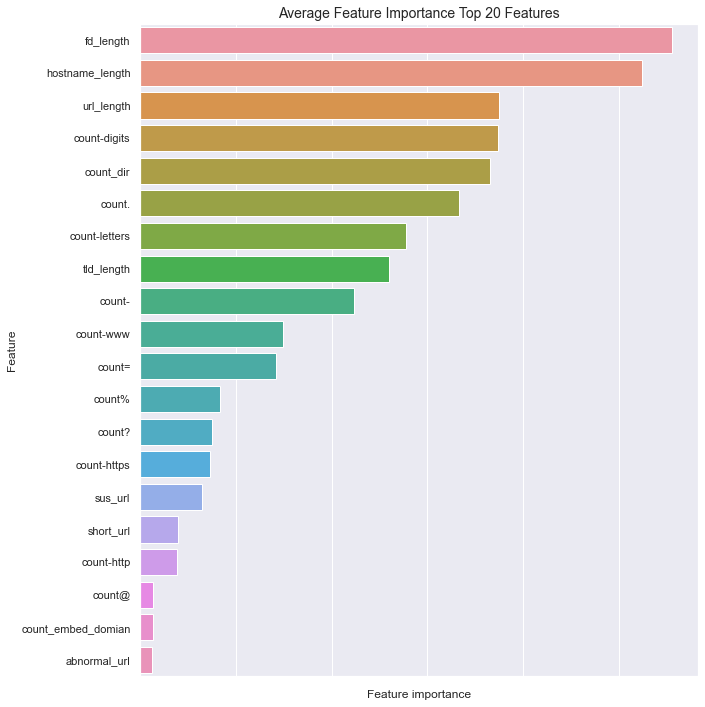

In [65]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
def plot_feature_importance():
    tmp = pd.DataFrame({'Feature': X_test.columns, 'Feature importance': feature_dataframe['mean'].values})
    tmp = tmp.sort_values(by='Feature importance',ascending=False).head(20)
    plt.figure(figsize = (10,12))
    plt.title('Average Feature Importance Top 20 Features',fontsize=14)
    s = sns.barplot(y='Feature',x='Feature importance',data=tmp, orient='h')
    s.set_xticklabels(s.get_xticklabels(),rotation=90)
    plt.show()
plot_feature_importance()